In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [2]:
# Obtain list of all time-average forces on stern of molecule
timeAvg_sternForces_fileList = glob.glob('out/timeAvg_sternForces.*.*.txt')

In [3]:
# Extract the displacement ratios from the filenames and turn them into a list of floats:
dispRatios = []
for fileName in timeAvg_sternForces_fileList:
    ratio = re.search("\.([01]\.[0-9][0-9])\.txt", fileName).group(1)
    ratio = np.float64(ratio)
    dispRatios.append(ratio)

In [4]:
# Extract the forces from the files
# These forces are in units of
# kcal / (mol * Angstrom)
listofForces = []
for file in timeAvg_sternForces_fileList:
    fileLines = open(file, "r").readlines()
    dataLines = fileLines[2:]
    forceLines = []
    
    for data in dataLines:
        force = re.findall(r"(?<= ).*(?=\n)", data)[0]
        forceLines.append(np.float64(force))

    listofForces.append(forceLines)

In [5]:
# Calculate means and StDevs from the forces
listofMeans = []
listofStDevs = []
for system in listofForces:
    listofMeans.append(np.mean(system))
    listofStDevs.append(np.std(system))

In [13]:
# Calculate the analytical forces predicted by Blundell-Terentjev:
analyticForces = []
k_B = 1.987204259e-3 # kcal / (mol * K)
L = 1121.3409 # Angstroms
T = 310.0 # K
l_p = 3000 # Angstroms

for x in dispRatios:
    force = -1 * (np.pi**2 * k_B * T * l_p * x / L**2) + 4 * k_B * T / (np.pi * l_p) * x / (1 - x**2)**2
    analyticForces.append(force)

C:\Users\Archie\AppData\Local\Temp\ipykernel_31616\193283983.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  force = -1 * (np.pi**2 * k_B * T * l_p * x / L**2) + 4 * k_B * T / (np.pi * l_p) * x / (1 - x**2)**2


(-0.2, 0.2)

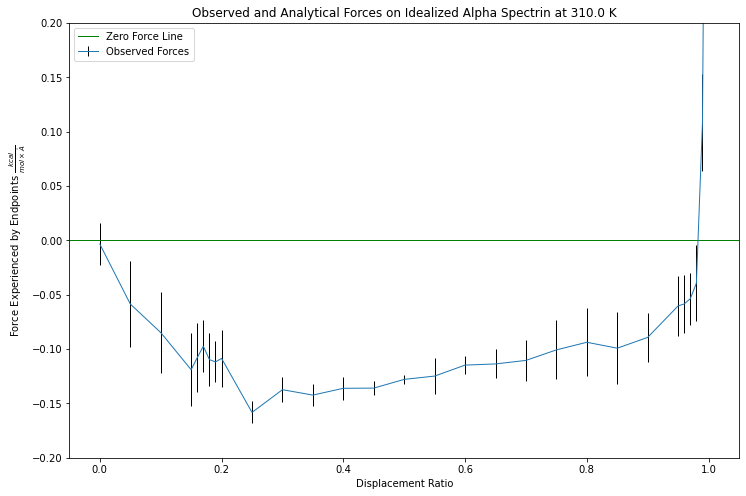

In [18]:
# Plot the observed and analytical forces:
plt.figure(figsize = (12,8))
plt.errorbar(x = dispRatios, y = listofMeans, yerr = listofStDevs,
             elinewidth = 1.0, ecolor = "k", linewidth = 1.0, label = "Observed Forces")
             # marker = 'o', markerfacecolor = "none")
# plt.plot(dispRatios, analyticForces, linewidth = 1.0, label = "Analytic Forces")
plt.axhline(y = 0, color = 'g', linestyle = '-', label = "Zero Force Line", linewidth = 1.0)
plt.legend(loc = "upper left")
plt.xlabel("Displacement Ratio")
plt.ylabel(r"Force Experienced by Endpoints $\frac{kcal}{mol \times \mathring{A}}$")
plt.title("Observed and Analytical Forces on Idealized Alpha Spectrin at 310.0 K")
plt.ylim([-0.2, 0.2])

The Blundell-Terentjev model has a singularity at a displacement ratio of 1.0, whereas our observed force is finite at that displacement ratio. As a result, the scaling of the graph caused by this singular behavior makes it hard to visually compare the BT model vs our observed data. Below is a log-scaled version of the above plot for better visual contrast:

Text(0.5, 1.0, 'Observed and Analytical Log-Scaled Forces on Idealized Alpha Spectrin at 310.0 K')

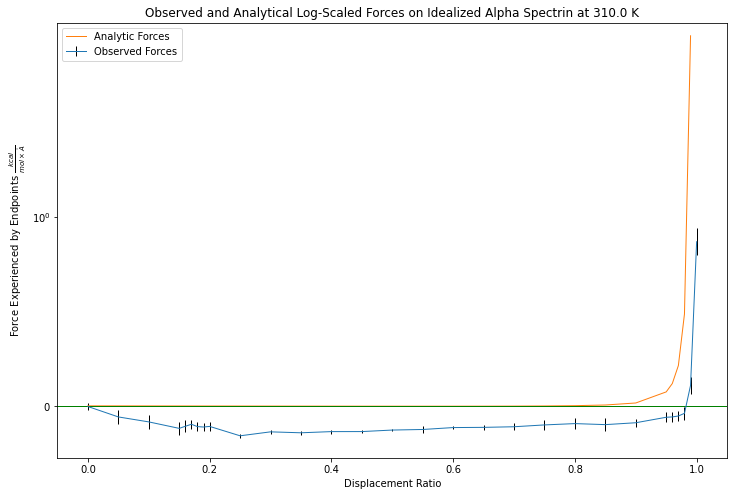

In [8]:
# Plot the observed and analytical forces, but with log-scale:
plt.figure(figsize = (12,8))
plt.errorbar(x = dispRatios, y = listofMeans, yerr = listofStDevs,
             elinewidth = 1.0, ecolor = "k", linewidth = 1.0, label = "Observed Forces")
             # marker = 'o', markerfacecolor = "none")
plt.plot(dispRatios, analyticForces, linewidth = 1.0, label = "Analytic Forces")
plt.legend(loc = "upper left")
plt.xlabel("Displacement Ratio")
plt.ylabel(r"Force Experienced by Endpoints $\frac{kcal}{mol \times \mathring{A}}$")
plt.axhline(y = 0, color = 'g', linestyle = '-', label = "Zero Force Line", linewidth = 1.0)
plt.yscale("symlog")
plt.title("Observed and Analytical Log-Scaled Forces on Idealized Alpha Spectrin at 310.0 K")

The force axis scaling on the plot still is not great, but we at least have a clearer picture of what's going on.

Previously, I accidentally forgot a factor of 10 for the persistence length. After using the correct persistence length, the force predicted by the BT model is now non-monotonic.

However, there is still one major difference between the BT model and the observed force: the derivative 